In [0]:

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [0]:
import zipfile

In [3]:
!unzip "/content/abstraction-and-reasoning-challenge.zip"

Archive:  /content/abstraction-and-reasoning-challenge.zip
replace evaluation/00576224.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [0]:
TEST_PATH =  'test/'
SUBMISSION_PATH =  'sample_submission.csv'

In [5]:
import os
import gc
#import cv2
import json
import time

import numpy as np
import pandas as pd
from pathlib import Path
from keras.utils import to_categorical

import seaborn as sns
#import plotly.express as px
from matplotlib import colors
import matplotlib.pyplot as plt
#import plotly.figure_factory as ff

#import torch
#T = torch.Tensor
#import torch.nn as nn
#from torch.optim import Adam
#from torch.utils.data import Dataset, DataLoader

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
test_task_files = sorted(os.listdir(TEST_PATH))

test_tasks = []
for task_file in test_task_files:
    with open(str(TEST_PATH + task_file), 'r') as f:
        task = json.load(f)
        test_tasks.append(task)

In [0]:
from sklearn.linear_model import LinearRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score

lr = LinearRegression(normalize=True)
#train = pd.read_csv('../input/abstraction-and-reasoning-challenge/sample_submission.csv')
#train.columns.to_list()
#test = pd.read_csv('../input/abstraction-and-reasoning-challenge/sample_submission.csv')
#test.columns.to_list()

In [0]:
Xs_test, Xs_train, ys_train = [], [], []

for task in test_tasks:
    X_test, X_train, y_train = [], [], []

    for pair in task["test"]:
        X_test.append(pair["input"])

    for pair in task["train"]:
        X_train.append(pair["input"])
        y_train.append(pair["output"])
    
    Xs_test.append(X_test)
    Xs_train.append(X_train)
    ys_train.append(y_train)

In [0]:
matrices = []
for X_test in Xs_test:
    for X in X_test:
        matrices.append(X)
        
values = []
for matrix in matrices:
    for row in matrix:
        for value in row:
            values.append(value)
            
df = pd.DataFrame(values)
df.columns = ["values"]

In [0]:
eval_path = 'evaluation/'
eval_tasks = sorted(os.listdir(eval_path))
task = []
eval_i = []
eval_o = []
eval_ti = []
eval_to = []
for i in range (0,400):
    
    task_file = str(eval_path + eval_tasks[i])

    with open(task_file, 'r') as f:
        task = json.load(f)
    for j in range(0,len(task)):
        
        if(j==0):    
            w=1
            for k in range(0,len(task['train'])):
                a = np.ones((28,28))*12
                x = len(task['train'][k]['input'])
                y = len(task['train'][k]['input'][0])
                
                for l in range(0,min(28,x)):
                    for m in range(0,min(28,y)):                        
                        a[l][m] = task['train'][k]['input'][l][m]                   
                eval_i.append(a)
                
                
                a = np.ones((28,28))*12
                x = len(task['train'][k]['output'])
                y = len(task['train'][k]['output'][0])
                for l in range(0,min(28,x)):
                    for m in range(0,min(28,y)):
                        a[l][m] = task['train'][k]['output'][l][m]                   
                eval_o.append(a)
                
                while(len(task['test']) - len(task['train']) -w > 0):
                    w=w+1
                    eval_i.append(a)
                    eval_o.append(a)
                
        else:
            w=1
            for k in range(0,len(task['test'])):
                a = np.ones((28,28))*12
                x = len(task['test'][k]['input'])
                y = len(task['test'][k]['input'][0])
                for l in range(0,min(28,x)):
                    for m in range(0,min(28,y)):
                        a[l][m] = task['test'][k]['input'][l][m]                   
                eval_ti.append(a)
           
                b = np.ones((28,28))*12
                x = len(task['test'][k]['output'])
                y = len(task['test'][k]['output'][0])
                for l in range(0,min(28,x)):
                    for m in range(0,min(28,y)):                        
                        b[l][m] = task['test'][k]['output'][l][m]                   
                eval_to.append(b)
                
            while(len(task['train']) - len(task['test']) -w +1 > 0):
                   #while(len(task['train']) - len(task['test']) -w > 0):
                w=w+1
                eval_ti.append(a) 
                eval_to.append(b)

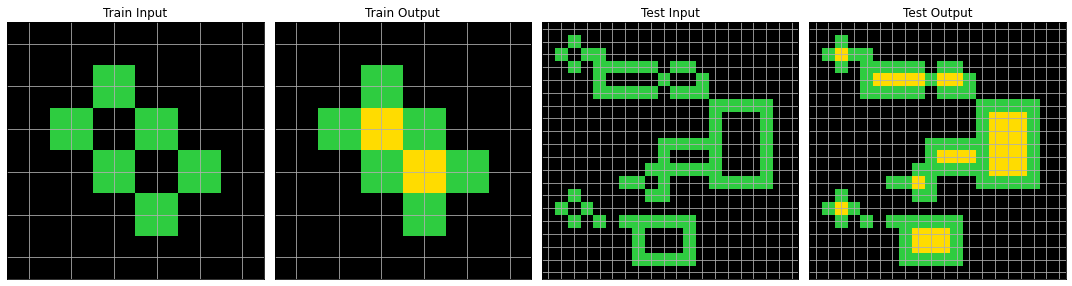

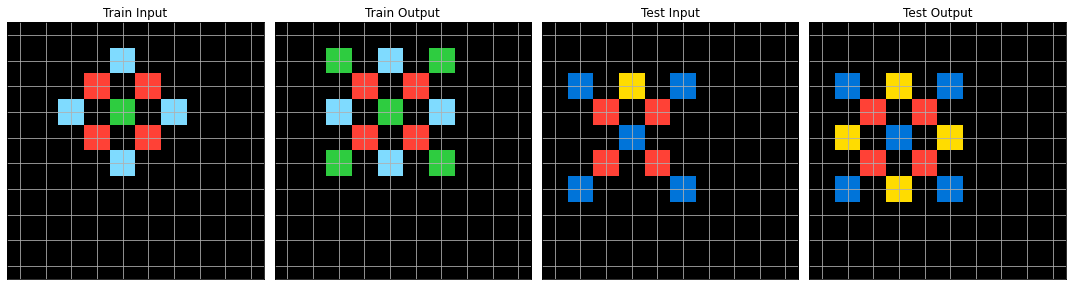

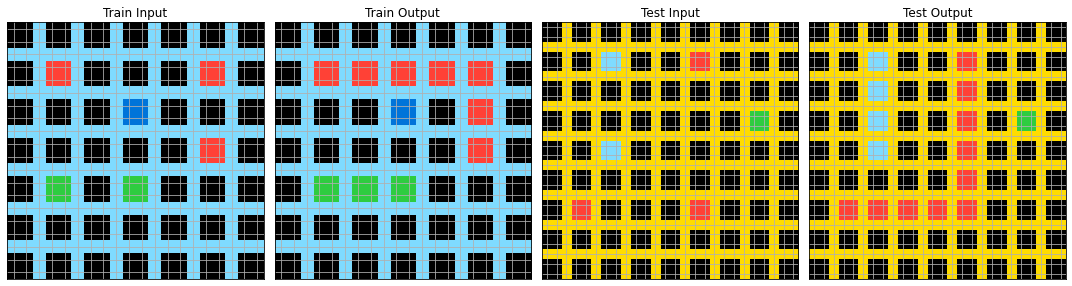

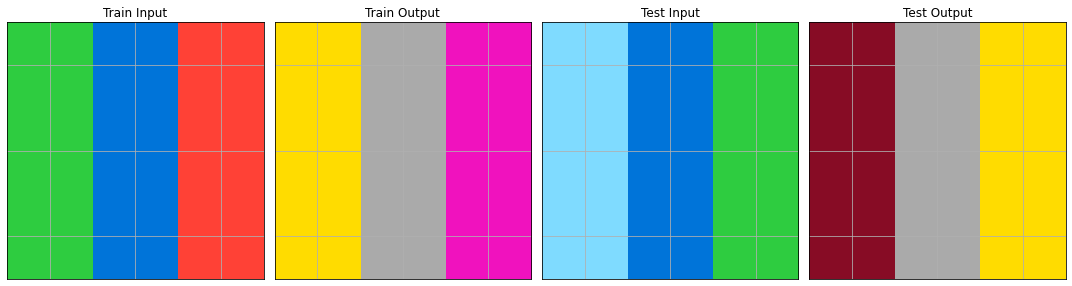

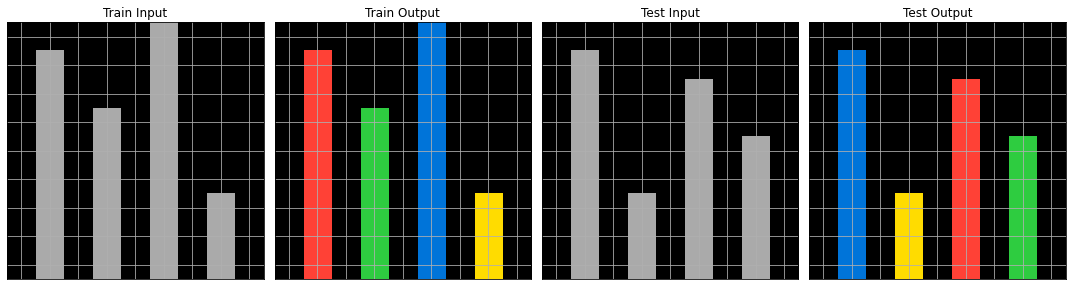

In [11]:
#data_path = Path('/kaggle/input/abstraction-and-reasoning-challenge/')
training_path = 'training/'
training_tasks = sorted(os.listdir(training_path))

for i in [1, 19, 8, 15, 9]:

    task_file = str(training_path + training_tasks[i])

    with open(task_file, 'r') as f:
        task = json.load(f)

    def plot_task(task):
        """
        Plots the first train and test pairs of a specified task,
        using same color scheme as the ARC app
        """
        cmap = colors.ListedColormap(
            ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
             '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
        norm = colors.Normalize(vmin=0, vmax=9)
        fig, ax = plt.subplots(1, 4, figsize=(15,15))
        ax[0].imshow(task['train'][0]['input'], cmap=cmap, norm=norm)
        width = np.shape(task['train'][0]['input'])[1]
        height = np.shape(task['train'][0]['input'])[0]
        ax[0].set_xticks(np.arange(0,width))
        ax[0].set_yticks(np.arange(0,height))
        ax[0].set_xticklabels([])
        ax[0].set_yticklabels([])
        ax[0].tick_params(length=0)
        ax[0].grid(True)
        ax[0].set_title('Train Input')
        ax[1].imshow(task['train'][0]['output'], cmap=cmap, norm=norm)
        width = np.shape(task['train'][0]['output'])[1]
        height = np.shape(task['train'][0]['output'])[0]
        ax[1].set_xticks(np.arange(0,width))
        ax[1].set_yticks(np.arange(0,height))
        ax[1].set_xticklabels([])
        ax[1].set_yticklabels([])
        ax[1].tick_params(length=0)
        ax[1].grid(True)
        ax[1].set_title('Train Output')
        ax[2].imshow(task['test'][0]['input'], cmap=cmap, norm=norm)
        width = np.shape(task['test'][0]['input'])[1]
        height = np.shape(task['test'][0]['input'])[0]
        ax[2].set_xticks(np.arange(0,width))
        ax[2].set_yticks(np.arange(0,height))
        ax[2].set_xticklabels([])
        ax[2].set_yticklabels([])
        ax[2].tick_params(length=0)
        ax[2].grid(True)
        ax[2].set_title('Test Input')
        ax[3].imshow(task['test'][0]['output'], cmap=cmap, norm=norm)
        width = np.shape(task['test'][0]['output'])[1]
        height = np.shape(task['test'][0]['output'])[0]
        ax[3].set_xticks(np.arange(0,width))
        ax[3].set_yticks(np.arange(0,height))
        ax[3].set_xticklabels([])
        ax[3].set_yticklabels([])
        ax[3].tick_params(length=0)
        ax[3].grid(True)
        ax[3].set_title('Test Output')
        plt.tight_layout()
        plt.show()

    plot_task(task)

In [0]:
# train_ti = np.asarray(train_ti)
# train_i = np.asarray(train_i)
# train_to = np.asarray(train_to)
# train_o = np.asarray(train_o)

In [0]:
# eval_ti = np.asarray(eval_ti)
# eval_i = np.asarray(eval_i)
# eval_to = np.asarray(eval_to)
# eval_o = np.asarray(eval_o)

In [0]:
train_ti = np.expand_dims(train_ti, axis=3)
train_i = np.expand_dims(train_i, axis=3)
train_to = np.expand_dims(train_to, axis=3)
train_o = np.expand_dims(train_o, axis=3)

In [0]:
eval_ti = np.expand_dims(eval_ti, axis=3)
eval_i = np.expand_dims(eval_i, axis=3)
eval_to = np.expand_dims(eval_to, axis=3)
eval_o = np.expand_dims(eval_o, axis=3)

In [18]:
print(train_ti.shape)
print(train_to.shape)

(1301, 28, 28, 1)
(1301, 28, 28, 1)


In [19]:
print(eval_ti.shape)
print(eval_to.shape)

(1363, 28, 28, 1)
(1363, 28, 28, 1)


In [0]:
task = []
test_i = []
test_o = []
test_ti = []
test_to = []
test_tasks = sorted(os.listdir(TEST_PATH))
for i in range (0,100):
    
    task_file = str(TEST_PATH + test_tasks[i])

    with open(task_file, 'r') as f:
        task = json.load(f)
    for j in range(0,len(task)):
        if(j==0):    
            w=1
            for k in range(0,len(task['test'])):
                a = np.ones((28,28))*12
                x = len(task['train'][k]['input'])
                y = len(task['train'][k]['input'][0])
                
                for l in range(0,min(28,x)):
                    for m in range(0,min(28,y)):                        
                        a[l][m] = task['train'][k]['input'][l][m]                   
                test_i.append(a)
                
                
                a = np.ones((28,28))*12
                x = len(task['train'][k]['output'])
                y = len(task['train'][k]['output'][0])
                for l in range(0,min(28,x)):
                    for m in range(0,min(28,y)):
                        a[l][m] = task['train'][k]['output'][l][m]                   
                test_o.append(a)
                
         #       while(len(task['test']) - len(task['train']) -w > 0):
         #           w=w+1
         #           test_ti.append(a)
         #           test_to.append(a)
                
        else:
            w=1
            for k in range(0,len(task['test'])):
                a = np.ones((28,28))*12
                x = len(task['test'][k]['input'])
                y = len(task['test'][k]['input'][0])
                for l in range(0,min(28,x)):
                    for m in range(0,min(28,y)):
                        a[l][m] = task['test'][k]['input'][l][m]                   
                test_ti.append(a)

In [0]:
# test_ti = np.asarray(test_ti)
# test_i = np.asarray(test_i)
# test_o = np.asarray(test_o)

In [0]:
test_ti = np.expand_dims(test_ti, axis=3)
test_i = np.expand_dims(test_i, axis=3)
test_o = np.expand_dims(test_o, axis=3)

In [24]:
print(len(test_ti))
print(len(test_i))

104
104


In [25]:
test_o.shape

(104, 28, 28, 1)

In [0]:
from keras.preprocessing import image
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.layers import MaxPooling2D, Dropout, UpSampling2D
from keras.utils import plot_model, layer_utils
import keras
from keras import layers
import tensorflow as tf

In [0]:
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input
from keras_applications.imagenet_utils import _obtain_input_shape
from keras.engine.topology import get_source_inputs
from keras.preprocessing import image
from keras.applications import resnet50, inception_v3, vgg16
from keras.models import Model, Sequential
from keras.layers import Activation, Dense, GlobalAveragePooling2D, Input, BatchNormalization, Flatten, Conv2D
from keras.optimizers import Adam


In [28]:
#model4 = Sequential()
#model1 = Sequential()
#model1.add(Dense(300, input_dim=40, activation='relu', name='layer_1'))
#model2 = Sequential()
#model2.add(Dense(300, input_dim=40, activation='relu', name='layer_2'))
#merged_model = Sequential()
from keras.layers.merge import concatenate
#merged_model.add(Merge([model1, model2], mode='concat'))
BB1 = Input((28, 28, 1))
#BB1 = tf.keras.layers.ZeroPadding2D(padding=((2,2),(2,2)))(BB1)
BBB1 = UpSampling2D((8, 8))(BB1)
BB2 = Input((28, 28, 1))
#BB2 = tf.keras.layers.ZeroPadding2D(padding=((2,2),(2,2)))(BB2)
BBB2 = UpSampling2D((8, 8))(BB2)
BB3 = Input((28, 28, 1))
#BB3 = tf.keras.layers.ZeroPadding2D(padding=((2,2),(2,2)))(BB3)
BBB3 = UpSampling2D((8, 8))(BB3)
ABB12 = keras.layers.concatenate([BBB2,BBB1],axis=3)
ABB123 = keras.layers.concatenate([ABB12,BBB3],axis=3)
model4 = Model(inputs=[BB1,BB2,BB3],outputs = [ABB123])
#A1234 = keras.layers.concatenate([model4.output,model3.input],axis=3)
#merged_model.add(Merge([model4, model3], mode='concat'))
model4.summary()
#model4.layers[0] = ABB123

#model5 = Model(inputs=[model3.input],outputs = [model3.layers[-3].output])
#model5.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
up_sampling2d_2 (UpSampling2D)  (None, 224, 224, 1)  0           input_2[0][0]                    
__________________________________________________________________________________________________
up_sampling2d_1 (UpSampling2D)  (None, 224, 224, 1)  0           input_1[0][0]                    
____________________________________________________________________________________________

In [0]:
#model = Model(inputs=[A1,C1,B1],outputs = [output_layer])
model4.compile(
    optimizer=Adam(lr=1e-4), 
    loss='mse',
    metrics=['accuracy']
)
#print(model.summary())

In [0]:
x_train1 = train_i
x_train2 = train_ti
x_train3 = train_o
y_train = train_to
x_val = train_i
y_val = train_o 
x_train1 = tf.cast(x_train1, tf.int32)
x_train2 = tf.cast(x_train2, tf.int32)
x_train3 = tf.cast(x_train3, tf.int32)
y_train = tf.cast(y_train, tf.int32)
x_eval1 = eval_i
x_eval2 = eval_ti
x_eval3 = eval_o
y_eval = eval_to
x_eval1 = tf.cast(x_eval1, tf.int32)
x_eval2 = tf.cast(x_eval2, tf.int32)
x_eval3 = tf.cast(x_eval3, tf.int32)
y_eval = tf.cast(y_eval, tf.int32)
#model = Model([A1,B1],output_layer)
#model.fit(x=[x_train1,x_train2],y=[y_train],batch_size=5,epochs=5)
#model.fit(inputs=[train_i,train_ti],outputs=[train_to],batch_size=1,epochs=5)
#merged = Model(inputs=[train_i,train_ti],outputs=[train_to])

In [31]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.utils import plot_model

from tensorflow import keras
a = np.ones((224,224,3))*12
y = []
y_e = []
for i in range (0,(x_train1.shape[0])):
    y.append(a)
    y_e.append(a)
y=np.array(y)
y_e=np.array(y_e)
model4.fit([x_train1,x_train3,x_train2],[y],steps_per_epoch=1,epochs=2,validation_data=([x_train1,x_train3,x_train2],[y]),validation_steps=1)
y = []
y_e = []
y = model4.predict([x_train1,x_train3,x_train2],steps =1)
y_e = model4.predict([x_eval1,x_eval3,x_eval2],steps =1)

Train on 1301 samples, validate on 1301 samples
Epoch 1/2
1/1 [==============================] - 2s 2s/step - loss: 19.6831 - accuracy: 0.9609 - val_loss: 19.6831 - val_accuracy: 0.9609
Epoch 2/2
1/1 [==============================] - 1s 1s/step - loss: 19.6831 - accuracy: 0.9609 - val_loss: 19.6831 - val_accuracy: 0.9609


In [0]:
y = tf.cast(y, tf.int32)
y_e = tf.cast(y_e, tf.int32)

In [33]:
print(y_train.shape)
type(y)

(1301, 28, 28, 1)


tensorflow.python.framework.ops.EagerTensor

In [36]:
model7 = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
x = model7.output
#x = GlobalAveragePooling2D()(x)
x2 = UpSampling2D((4, 4))(x)
#x3 = Conv2D(64, (3, 3), activation='softplus', padding='same')(x2)
#x4 = Conv2D(16, (3, 3), activation='softplus', padding='same')(x3)
#pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
x5 = Conv2D(4, (3, 3), activation='softsign', padding='same')(x2)
x6 = Conv2D(1, (3, 3), activation='softplus', padding='same')(x5)
#x = Dense(300, activation='relu')(x)
#predictions = Dense(num_classes, activation='softmax')(x)
model8 = Model(inputs=[model7.input], outputs=[x6])
model8.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [37]:
len(model8.layers)

22

In [38]:
i=0
for layer in model8.layers:
    if(i<2):
        i=i+1
    else :
        model8.layers[i].trainable = False
        i=i+1
    if(i>17):
        break
        
model8.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

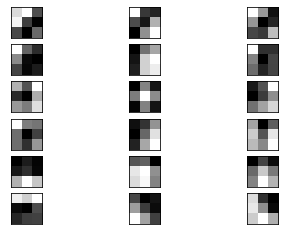

In [39]:
filters, biases = model8.layers[2].get_weights()
from matplotlib import pyplot
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)


# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # plot each channel separately
    for j in range(3):
# specify subplot and turn of axis
        ax = pyplot.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
# plot filter channel in grayscale
        pyplot.imshow(f[:, :, j], cmap='gray')
        ix += 1
# show the figure
pyplot.show()

In [0]:
#model = Model(inputs=[A1,C1,B1],outputs = [output_layer])
model8.compile(
    optimizer=Adam(lr=1e-4), 
    loss='mse',
    metrics=['accuracy']
)
#print(model8.summary())

#@title Default title text
from keras import backend as K
K.clear_session()
tf.compat.v1.reset_default_graph()

In [41]:
print(model8.layers[-1].output_shape)

(None, 28, 28, 1)


In [42]:
y.shape

TensorShape([1301, 224, 224, 3])

In [45]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.utils import plot_model

from tensorflow import keras
model8.fit([y[:100]],[y_train[:100]],steps_per_epoch=10,epochs=20,validation_data=([y_e[:200]],[y_eval[:200]]),validation_steps=1)
#x_train1[0].dtype

Train on 100 samples, validate on 200 samples
Epoch 1/20
10/10 [==============================] - 49s 5s/step - loss: 103.2381 - accuracy: 0.0688 - val_loss: 88.9451 - val_accuracy: 0.0419
Epoch 2/20
10/10 [==============================] - 19s 2s/step - loss: 97.2067 - accuracy: 0.0127 - val_loss: 82.5526 - val_accuracy: 0.0289
Epoch 3/20
10/10 [==============================] - 19s 2s/step - loss: 90.5331 - accuracy: 0.0076 - val_loss: 77.2399 - val_accuracy: 0.0243
Epoch 4/20
10/10 [==============================] - 19s 2s/step - loss: 85.2129 - accuracy: 0.0088 - val_loss: 73.7281 - val_accuracy: 0.0223
Epoch 5/20
10/10 [==============================] - 19s 2s/step - loss: 81.8486 - accuracy: 0.0096 - val_loss: 71.3028 - val_accuracy: 0.0216
Epoch 6/20
10/10 [==============================] - 19s 2s/step - loss: 79.4191 - accuracy: 0.0102 - val_loss: 69.5676 - val_accuracy: 0.0211
Epoch 7/20
10/10 [==============================] - 19s 2s/step - loss: 77.6668 - accuracy: 0.0105 - 